# Pseudo_Facebook_Data_Analysis

Our objecive is to understand users behavior and their demographics, any underlying patterns in the data, what they are doing on the Facebook and what they use etc. etc. This is my very first exploratory data analysis in Python.

Please note this is not a real Facebook dataset.

### Importing required pacakeges

In [1]:
!pip install pandas-profiling
import numpy as np
from numpy.random import randn 

import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
import pandas_profiling

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\Shekhar\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Shekhar\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Shekhar\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Shekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Shekhar\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_

### Reading data (note: data file has tab seperated values instead of comma seperated)

In [2]:
fb=pd.read_csv('pseudo_facebook.tsv', sep='\t')

### Dataset - Atrribute Information

    userid: Id of user
    age: User's Age (years)
    dob_day: Day of date of birth
    dob_year: Year of date of birth
    dob_month: Month of date of birth
    gender: User's gender
    tenure: User's association with Facebook
    friend_count: Total no. of friends
    friendships_initiated: Friend requests sent
    likes: Total no. of likes sent by user
    likes_received: Total no. of likes received by user
    mobile_likes: Total no. of likes sent by user through mobile
    mobile_likes_received: Total no. of likes received by user through mobile
    www_likes: Total no. of likes sent by user through desktop website
    www_likes_received: Total no. of likes received by user through website


In [3]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


#### In dataset we have 15 columns and 99003 records of which gender column has 175 & tenure column has 2 missing cases, below is the descriptive statistics of each numeric cloumn

In [4]:
fb.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


#### We can also create full HTML profiling report from pandas DataFrame objects for all variables/columns 

In [5]:
report = pandas_profiling.ProfileReport(fb)
report.to_file("profile_report.html")

### Data overview
    - Top 10 rows of dataset
    - Bottom 10 rows of dataset

In [6]:
fb.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [7]:
fb.tail(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692
98995,1132164,20,9,1993,10,female,699.0,3611,973,4507,7768,4414,6909,93,859
98996,1668695,24,25,1989,4,female,182.0,2938,1272,6018,17765,5843,11708,175,6057
98997,1458985,28,14,1985,12,female,290.0,2218,1618,4626,10268,4290,4250,336,6018
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


### Data wrangling --> Missing Values treatment

In [8]:
#finding out variables with missing value
fb.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

#### Here we see that gender has 175 (0.177%) and tenure has 2 (0.002%) missing values, since missing values are very very lees, we can also drop these  row as well instead of replacing

In [9]:
fb['gender'].mode()

0    male
dtype: object

In [10]:
#Replace gender's missing by mode
fb['gender'].fillna(fb['gender'].mode()[0], inplace=True)
fb.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [11]:
fb['tenure'].mean()

537.8873748750012

In [12]:
#Replace gender's missing by mean
fb['tenure'].fillna(fb['tenure'].mode()[0], inplace=True)
fb.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

### Data wrangling --> Outlier Detection & Treatment
We will use IQR rule to remove outliers

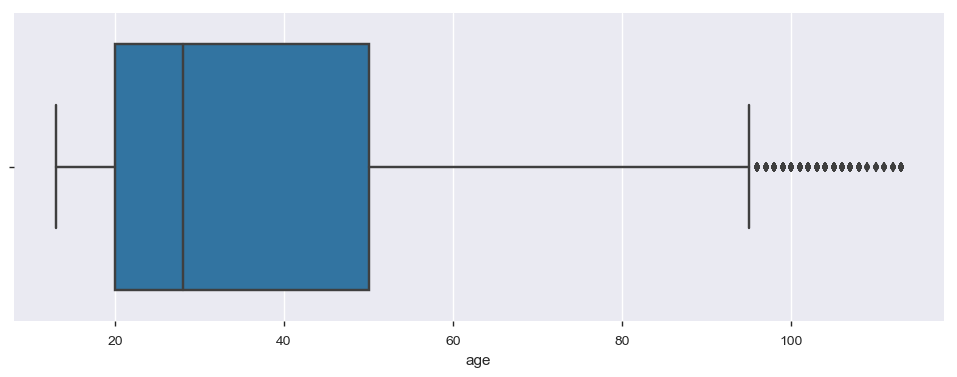

In [13]:
plt.figure(figsize=(12,4))
sns.boxplot(x='age',data=fb)

#### From the above age boxplot, age 95+ years seems to be outlier, let us remove the outliers using IQR rule

In [14]:
from collections import Counter
outlier_indices = []

Q1 = np.percentile(fb['age'],25)
Q3 = np.percentile(fb['age'],75)
IQR = Q3 - Q1

# outlier step
outlier_step = 1.5 * IQR
        
# Determine a lst of indices of outliers for feature col
outlier_list_col = fb[(fb['age'] < Q1 - outlier_step) | (fb['age'] > Q3 + outlier_step )].index
        
# append the found outlier indices for col to the list of outlier indices 
outlier_indices.extend(outlier_list_col)
outlier_indices = Counter(outlier_indices)
IQR, Q3, Q1, outlier_step

(30.0, 50.0, 20.0, 45.0)

In [15]:
fb=fb.drop(outlier_indices, axis = 0).reset_index(drop=True)
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94689 entries, 0 to 94688
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94689 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 10.8+ MB


In [16]:
#descriptive statistcs after data cleaning
fb.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.468900e+04,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000
mean,1.597239e+06,34.194268,14.531181,1978.805732,6.285577,512.010645,187.205811,103.655314,156.273031,143.121778,106.572833,84.177814,49.700134,58.943922
std,3.441140e+05,17.729108,8.993114,17.729108,3.522052,431.610038,373.920512,184.945801,577.365956,1414.113509,448.769500,852.926814,288.504027,614.112766
min,1.000008e+06,13.000000,1.000000,1918.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299041e+06,20.000000,7.000000,1967.000000,3.000000,221.000000,30.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596341e+06,27.000000,14.000000,1986.000000,6.000000,401.000000,78.000000,44.000000,10.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.896064e+06,46.000000,22.000000,1993.000000,9.000000,644.000000,196.000000,111.000000,79.000000,57.000000,45.000000,32.000000,6.000000,19.000000
max,2.193542e+06,95.000000,31.000000,2000.000000,12.000000,2697.000000,4917.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


### Data Transformations

#### Creating buckets for actual age & tenute to better understand usage pattern

In [17]:
def age_group(m):
  if m['age'] >= 13 and m['age'] <= 17 :
     return '13-17 years'
  elif m['age'] >= 18 and m['age'] <= 24 :
     return '18-24 years'
  elif m['age'] >= 25 and m['age'] <= 34 :
     return '25-34 years'
  elif m['age'] >= 35 and m['age'] <= 44:
     return '35-44 years'
  elif m['age'] >= 45 and m['age'] <= 54:
     return '45-54 years'
  elif m['age'] >= 55 and m['age'] <= 64:
     return '55-64 years'
  elif m['age']  >= 65:
     return '65+ years'
  
fb['age_group'] = fb.apply(lambda m: age_group(m),axis=1)

In [18]:
def tenure_group(m):
  if m['tenure'] <365 :
     return 'Less than 1 year'
  elif m['tenure'] >= 365 and m['tenure'] < 730 :
     return '1 year'
  elif m['tenure'] >= 730 and m['tenure'] < 1095 :
     return '2 years'
  elif m['tenure'] >= 1095 and m['tenure'] < 1460 :
     return '3 years'
  elif m['tenure'] >= 1460 and m['tenure'] < 1825 :
     return '4 years'
  elif m['tenure'] >= 1825 and m['tenure'] < 2190 :
     return '5 years'
  elif m['tenure'] >= 2190:
     return '6+ years'

fb['tenure_group'] = fb.apply(lambda m: tenure_group(m),axis=1)

In [19]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94689 entries, 0 to 94688
Data columns (total 17 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94689 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
age_group                94689 non-null object
tenure_group             94689 non-null object
dtypes: float64(1), int64(13), object(3)
memory usage: 12.3+ MB


### User Demographics

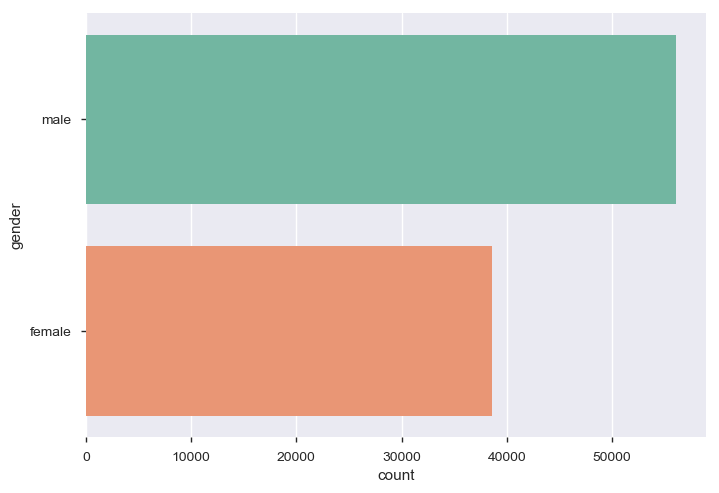

In [20]:
ax = sns.countplot(y="gender",data=fb, palette="Set2")

#### Facebook has more male users than female users

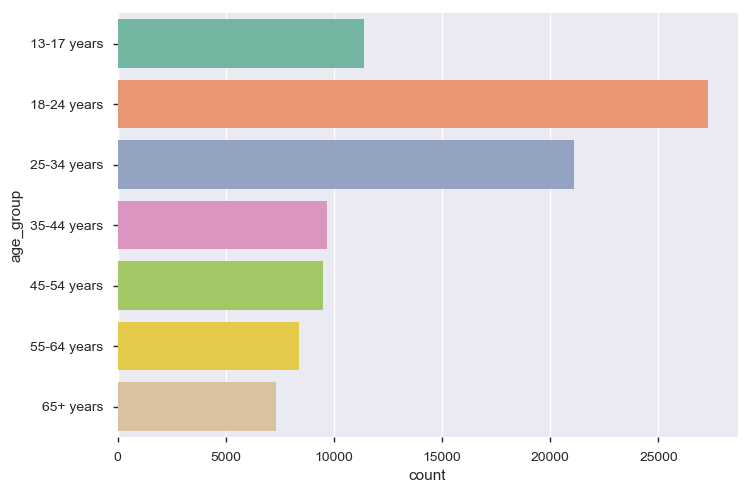

In [21]:
ax = sns.countplot(y="age_group",data=fb, palette="Set2")

#### Maximum users are of 18-24 years of age followed by 25-34 years and lowest in 65+years, let us now dig into this futher gender-wise

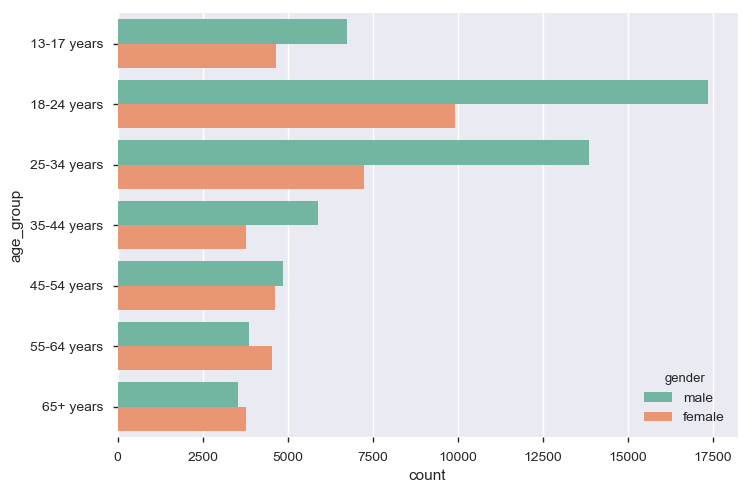

In [22]:
ax = sns.countplot(y="age_group",data=fb, palette="Set2", hue="gender")

#### From above visualization, we can conclude that in 13-54 years of age group, we have more male users where as in 55+ years we have more female users

### Date of birth analysis

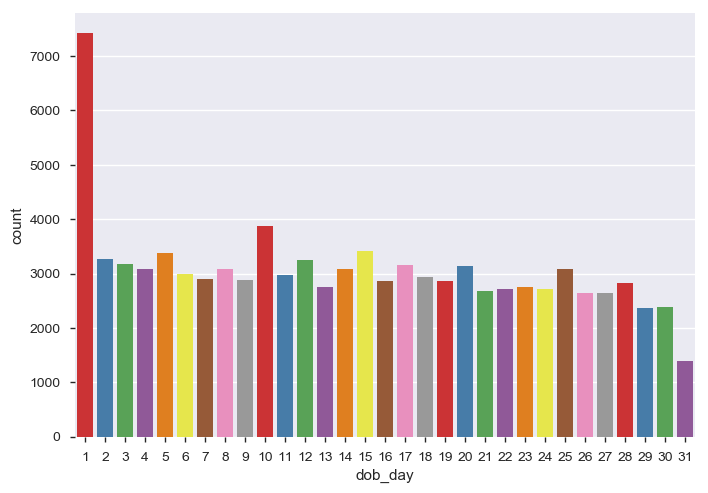

In [23]:
#let us first plot the frequency distribution of dob_day
ax = sns.countplot(x="dob_day", data=fb, palette="Set1")

#### Here we see that most of the users have thier birthday on 1st day of every month, which is slighlty weired/can not be a coincidence, let us dig into it further

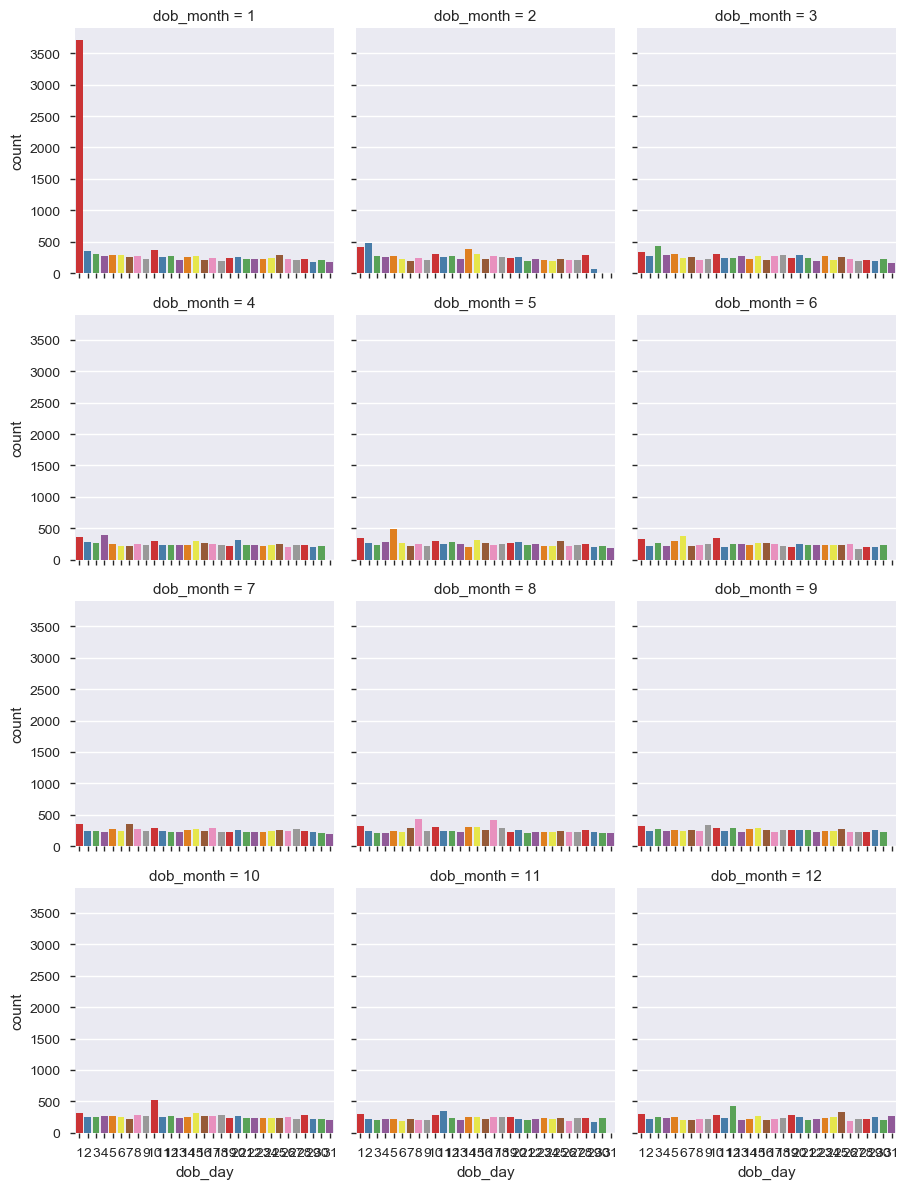

In [24]:
#let us now plot the frequency distribution of dob_day by dob_month wise to understand the data 
ax = sns.factorplot(x="dob_day", col="dob_month", data=fb, col_wrap=3, kind="count", palette="Set1", size=3, aspect=1)

#### Here we see that most of the users have thier birthday on 1st Jan,this might be because of the privecy setting if user does not specify his/her bithday by default it will be 1st Jan

### Friends count analysis

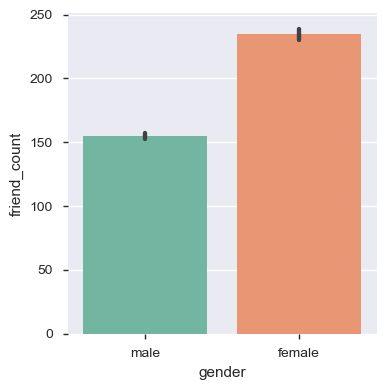

In [25]:
sns.factorplot(x="gender", y="friend_count", data=fb, kind="bar", aspect=1,palette="Set2",size=4)

In [26]:
fb.groupby('gender').friend_count.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,38558.0,234.446055,465.704715,0.0,36.0,93.0,235.0,4863.0
male,56131.0,154.755126,290.337201,0.0,26.0,70.0,171.0,4917.0


#### Average no. of friends for female user are more than male user, let us see it further age-wise

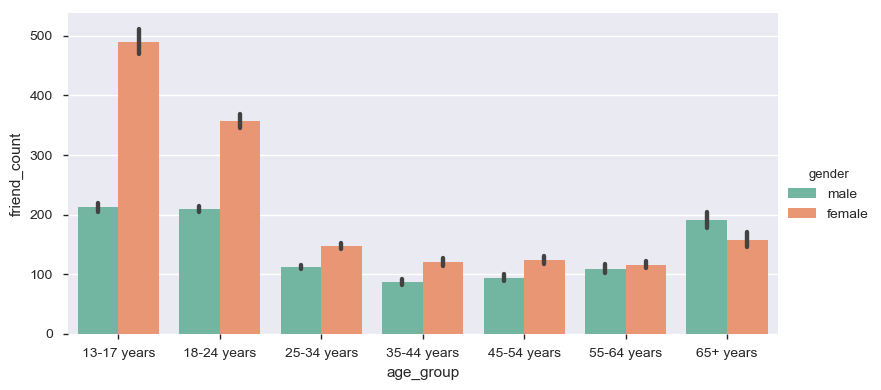

In [27]:
sns.factorplot(x="age_group", y="friend_count", data=fb, kind="bar", hue='gender', aspect=2,palette="Set2")

#### 13-17 years female users have highest friend_count and 55-64 years have lowest but still more than male users
#### only 65+ years age group male users have more friends than female but that too not very significant

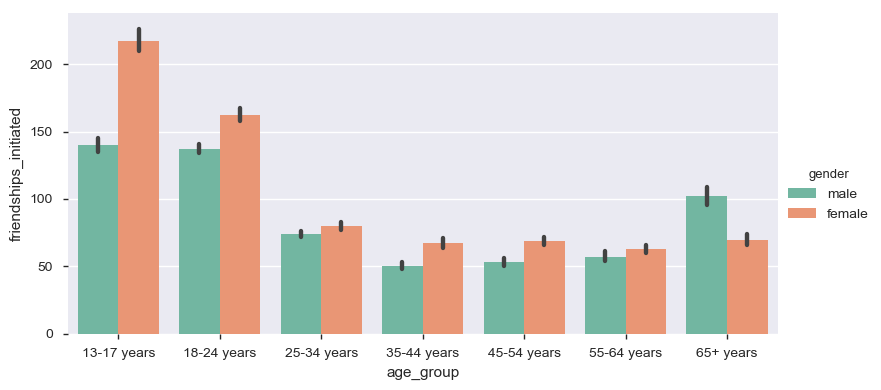

In [28]:
sns.factorplot(x="age_group", y="friendships_initiated", data=fb, kind="bar", hue='gender', aspect=2,palette="Set2")

#### Female users initiated much more friendship, 13-17 years is highest and lowest among 55-64 years
####  Only in 65+ years age group, males users initiated more friendship than female users

### Tenure Analysis

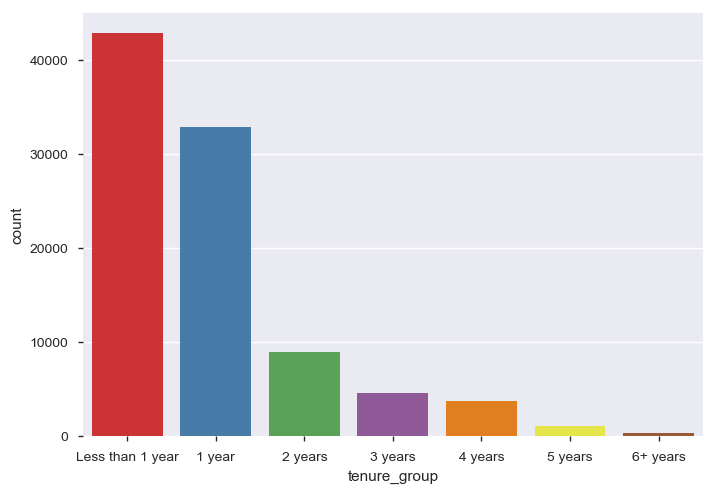

In [29]:
ax = sns.countplot(x="tenure_group",data=fb, palette="Set1")

#### Above visualization shows high increase in no. of users year on year with massive growth in no. of users in last 2 years

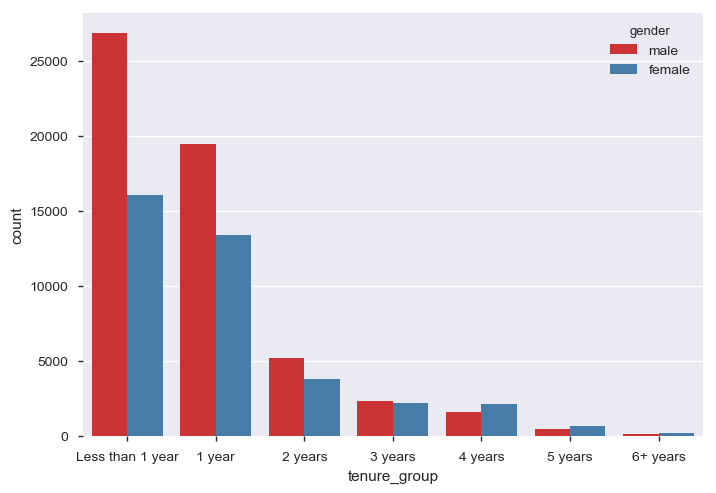

In [30]:
ax = sns.countplot(x="tenure_group",data=fb, palette="Set1", hue='gender')

#### We can conclude that male users have signed up more significantly in last 3 years than female
#### but 4 years back there were slightly more female users than male

### Like Analysis

In [31]:
fb[['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']].describe()

,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000,94689.000000
mean,156.273031,143.121778,106.572833,84.177814,49.700134,58.943922
std,577.365956,1414.113509,448.769500,852.926814,288.504027,614.112766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,79.000000,57.000000,45.000000,32.000000,6.000000,19.000000
max,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


#### above is the descriptive statistics of likes send & recieves

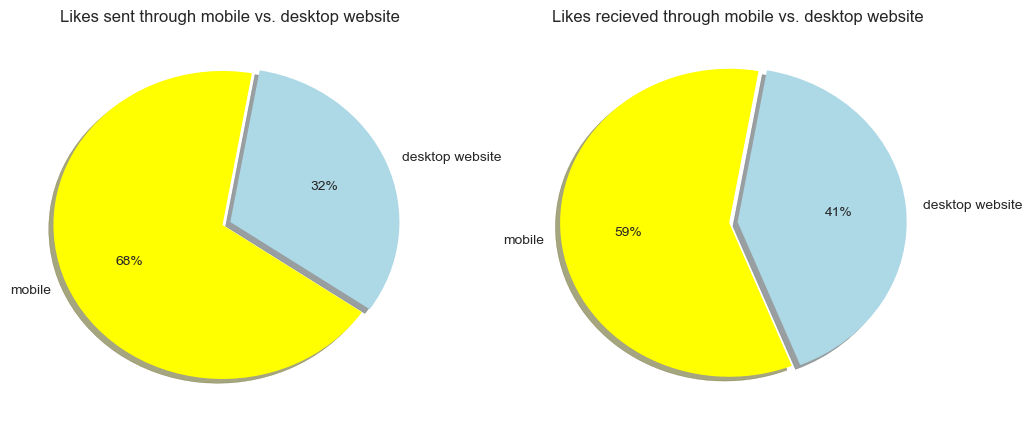

In [32]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

values=[fb.mobile_likes.sum(),fb.www_likes.sum()]
labels=['mobile','desktop website']
explode = (0.05, 0)
colors = ['yellow','lightblue']
plt.pie(values, colors=colors, labels=labels, autopct='%1.0f%%', shadow=True, startangle=80, explode=explode)
plt.title('Likes sent through mobile vs. desktop website', fontsize=12)

plt.subplot(1,2,2)

values=[fb.mobile_likes_received.sum(),fb.www_likes_received.sum()]
labels=['mobile','desktop website']
explode = (0.05, 0)
colors = ['yellow','lightblue']
plt.pie(values, colors=colors, labels=labels, autopct='%1.0f%%',shadow=True, startangle=80, explode=explode)
plt.title('Likes recieved through mobile vs. desktop website', fontsize=12)

#plt.tight_layout()
plt.show()

#### Mobile usages is much more than desktop website

In [33]:
(fb.mobile_likes > 0).value_counts()

True     60804
False    33885
Name: mobile_likes, dtype: int64

In [34]:
fb['mobile_access'] = pd.Series(np.where(fb['mobile_likes'] > 0, 1, 0)).astype('category')
fb.mobile_access.value_counts()

1    60804
0    33885
Name: mobile_access, dtype: int64

In [35]:
frac = (fb.mobile_access == 1).sum()/fb.mobile_access.size
print("Mobile access = ", frac)

Mobile access =  0.6421442828628457


#### Facebook access through mobile is 64% which is more than desktop website 36% so it is good to devlop such social media moible apps 

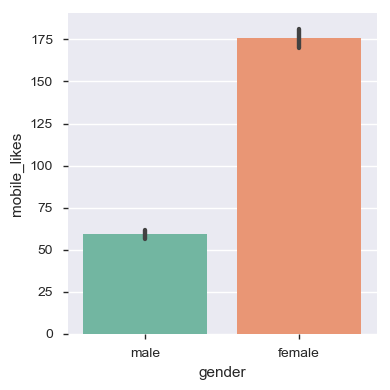

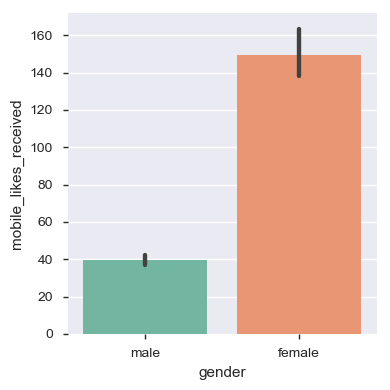

In [36]:
ax1=sns.factorplot(x="gender", y="mobile_likes", data=fb, kind="bar", aspect=1,palette="Set2",size=4)
ax2=sns.factorplot(x="gender", y="mobile_likes_received", data=fb, kind="bar", aspect=1,palette="Set2",size=4)


#### Female users sent and recieved more likes than male users

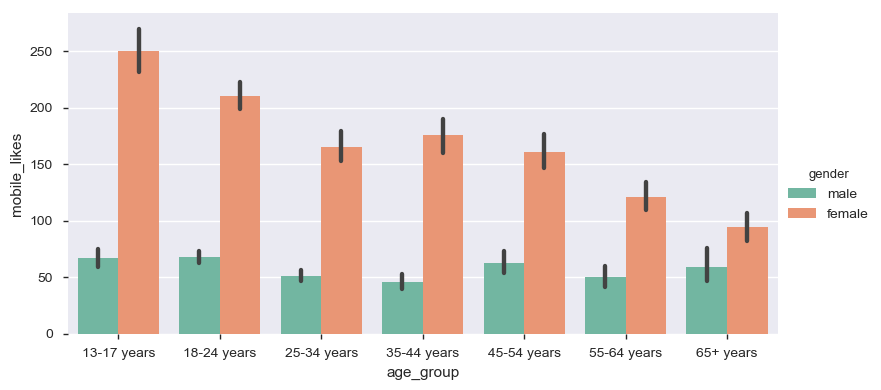

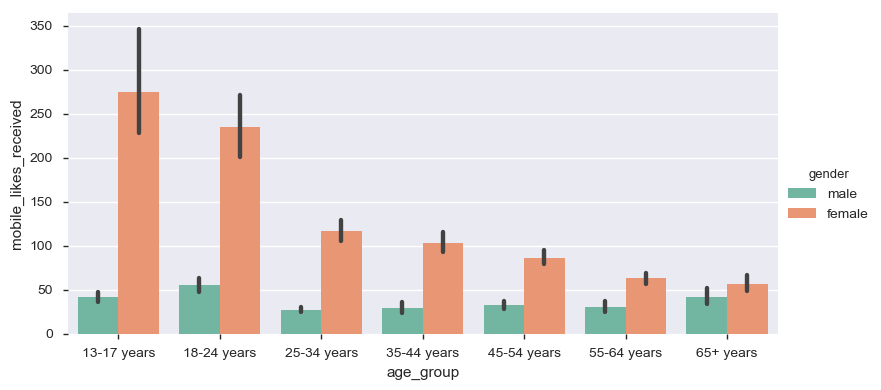

In [37]:
ax1=sns.factorplot(x="age_group", y="mobile_likes", data=fb, kind="bar", aspect=2,palette="Set2",size=4, hue="gender")
ax2=sns.factorplot(x="age_group", y="mobile_likes_received", data=fb, kind="bar", aspect=2,palette="Set2",size=4,
                   hue="gender")

#### 13-17 years female users sent and recieved more likes and average no. of likes goes down as the age increases
#### Among male users 18-24 years are most active

### Some more plots

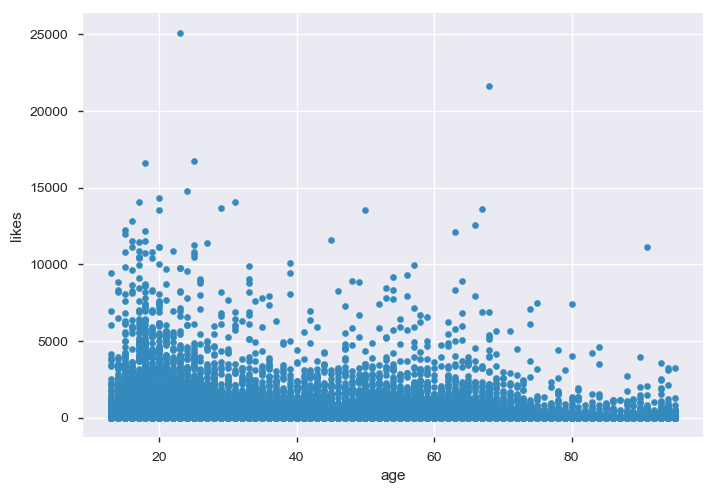

In [38]:
fb.plot(kind="scatter", x="age", y="likes")

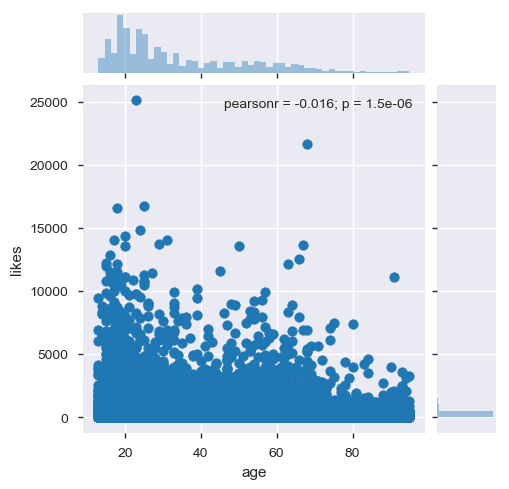

In [39]:
sns.jointplot(x="age", y="likes", data=fb, size=5)

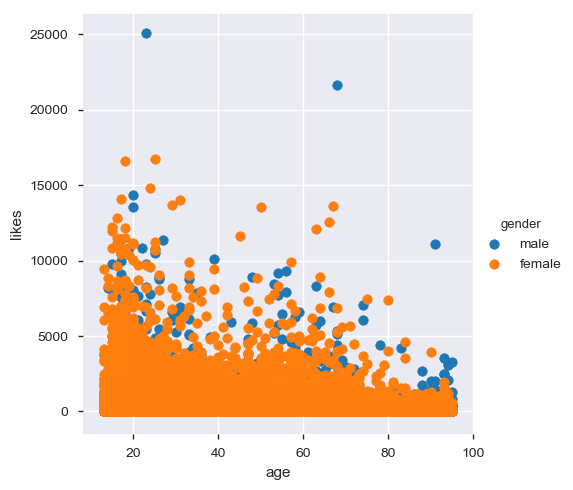

In [40]:
sns.FacetGrid(fb, hue="gender", size=5) \
   .map(plt.scatter, "age", "likes") \
   .add_legend()

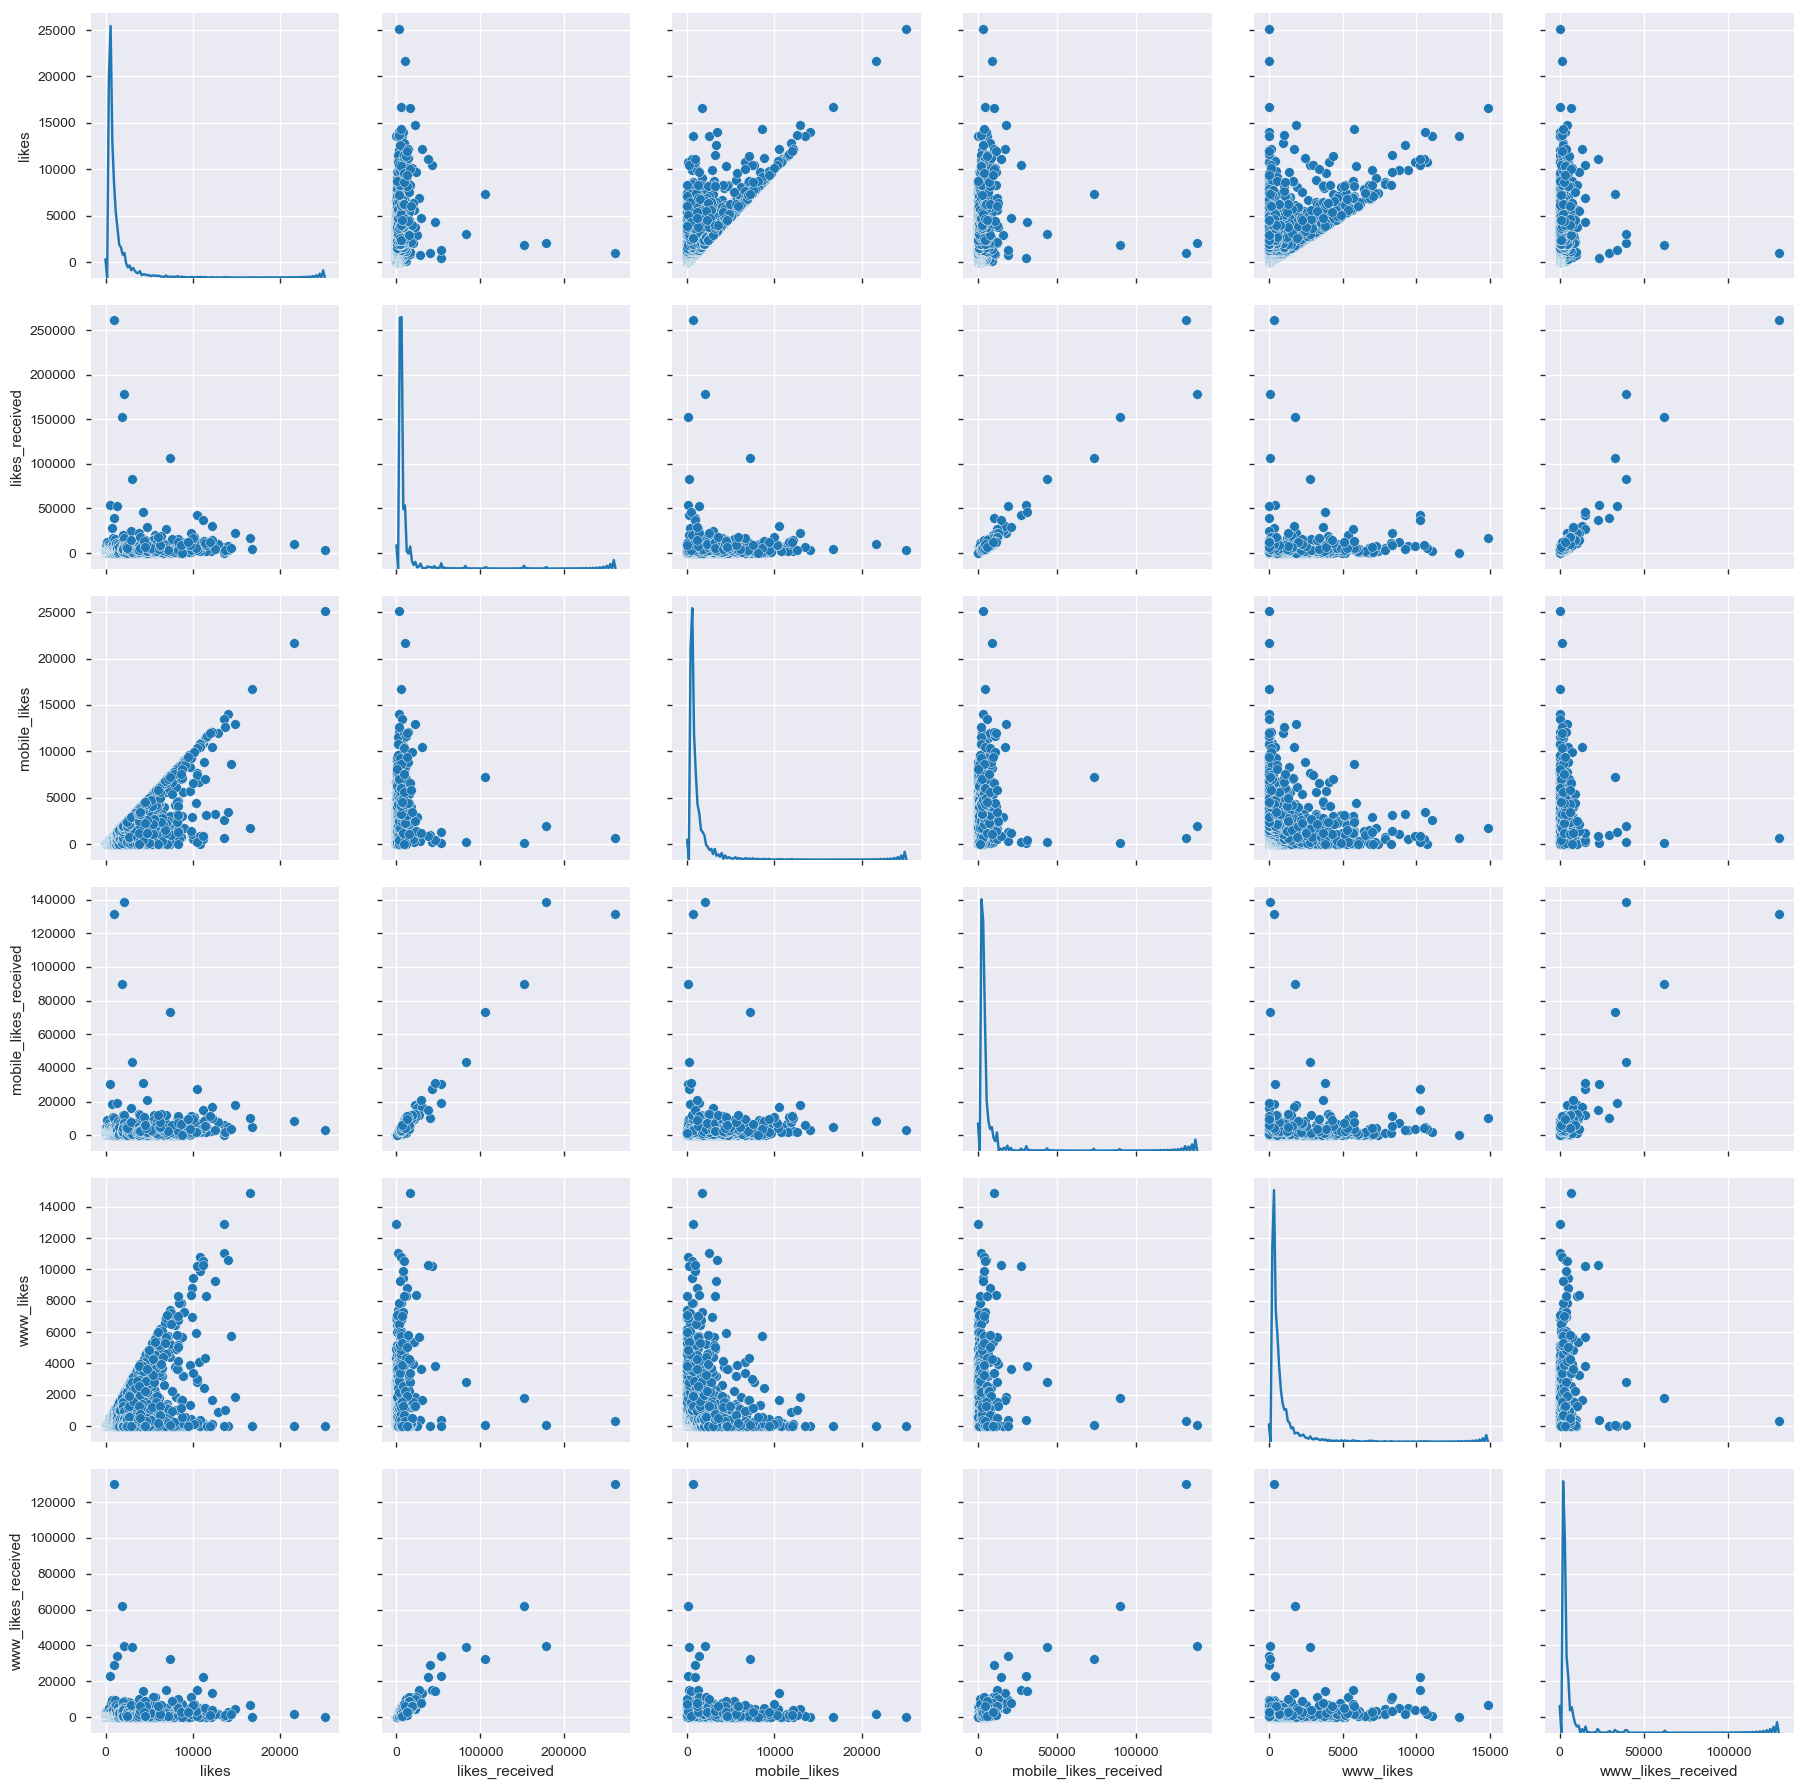

In [41]:
sns.pairplot(fb[['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']], 
             size=3, diag_kind="kde")

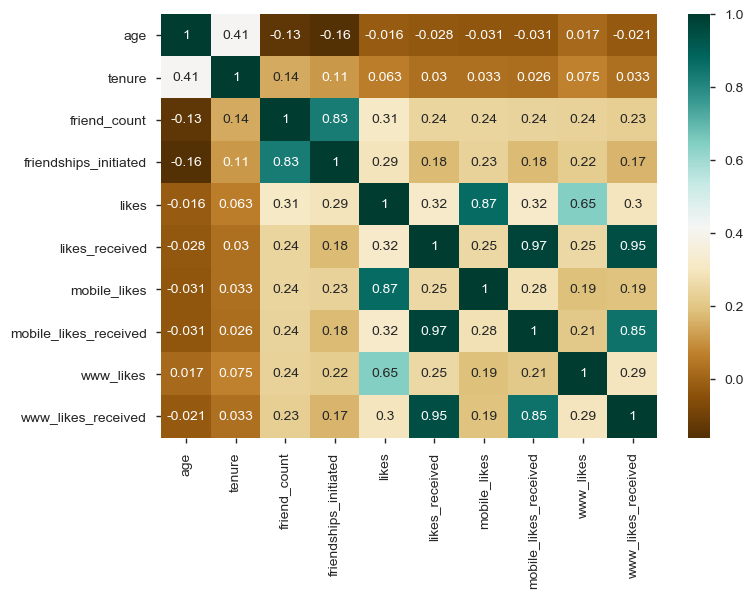

In [42]:
sns.heatmap(fb[['age','tenure','friend_count','friendships_initiated','likes','likes_received','mobile_likes',
                'mobile_likes_received','www_likes','www_likes_received']].corr(),cmap="BrBG",annot=True)

#### There is no correlation between age, tenure, friend count & friendships initiated 